In [7]:
%load_ext autoreload
%autoreload 2
from IPython.display import HTML
import reg_helper as RHelper
from fnn_helper import PlotLosses

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
import draw_nn
from matplotlib import pyplot as plt 
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy') 
y_test = np.load('y_test.npy')

# Early stop

## Regresión Logística polinomial

In [5]:
degree = 18
# descarto la primer columna de 1s debido a que el bias lo agrega la red neuronal
X_train_degree = RHelper.get_polynimial_set(X_train, degree=degree, bias=False)
X_test_degree = RHelper.get_polynimial_set(X_test, degree=degree, bias=False)
basic_model = RHelper.get_basic_model(X_train_degree.shape[1], 1)
basic_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Salida (Dense)               (None, 1)                 190       
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


### Importante aca el ModelCheckpoint!!!

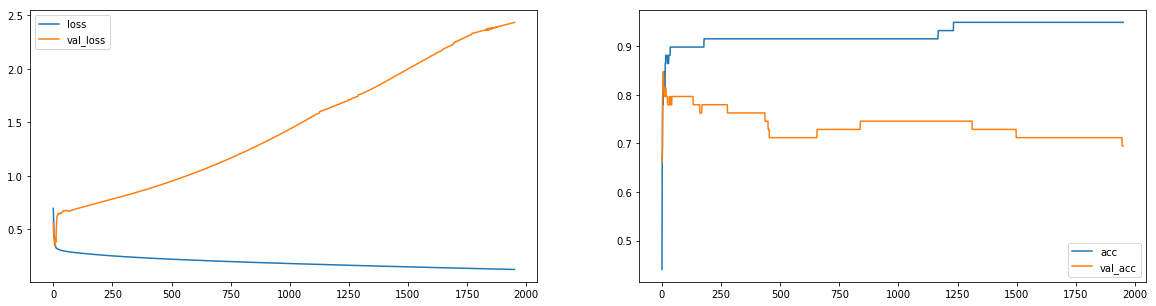

In [9]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='basic_model_best.hdf5', verbose=0, save_best_only=True)
plot_losses = PlotLosses(plot_interval=50, evaluate_interval=None, x_val=X_test_degree, y_val_categorical=y_test)
basic_model = RHelper.get_basic_model(X_train_degree.shape[1], 1, lr=0.5)
basic_model.fit(X_train_degree, 
          y_train, batch_size = 59,
          epochs=2000, 
          verbose=0, 
          validation_data=(X_test_degree, y_test), 
          callbacks=[plot_losses, checkpointer],
         )

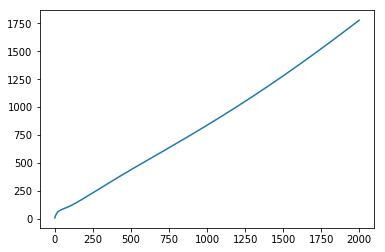

In [10]:
plt.plot(RHelper.get_weights_array(plot_losses.weights))
plt.show()